In [1]:
configTraining = {
    "vibrio-training":{
        "model-training-name" : "Vibrio-eFishery",
        "roboflow-project" : "vibrio-model-mk2",
        "project-name": "Take Home Test Model-eFishery",
        "task-name": "YOLOv8 Training Model Vibrio",
        "task-id": "8fd718bdf6914166bb8f0ecfb9832a73"
    },
    "OCR-training":{
        "model-training-name" : "OCR-eFishery",
        "roboflow-project" : "document-model",
        "project-name": "Take Home Test Model-eFishery",
        "task-name": "YOLOv8 Training Model OCR",
        "task-id": "980e8d5c26984ddeb6d5d61c11d8c87a"
    }
}

yolov8Config = {
    "yolov8n":{
        "yaml-file": "yolov8n.yaml",
        "pt-weight": "yolov8n.pt"
    },
    "yolov8s":{
        "yaml-file": "yolov8s.yaml",
        "pt-weight": "yolov8s.pt"
    },
    "yolov8m":{
        "yaml-file": "yolov8m.yaml",
        "pt-weight": "yolov8m.pt"
    },
    "yolov8l":{
        "yaml-file": "yolov8l.yaml",
        "pt-weight": "yolov8l.pt"
    },
    "yolov8x":{
        "yaml-file": "yolov8x.yaml",
        "pt-weight": "yolov8x.pt"
    }
}

selectedTrainingName = "OCR-training" #@param ["vibrio-training", "OCR-training"]
trainModel = "yolov8l" #@param ["yolov8n", "yolov8s", "yolov8m", "yolov8l", "yolov8x"]

configuredTraining = configTraining[selectedTrainingName]
modelTraining = yolov8Config[trainModel]

In [4]:
# Import OS module and Create folder base on user who use it
import os
import shutil
modelTrainingName = configuredTraining["model-training-name"]
dirs = "/content/drive/MyDrive/TrainingModel/YOLOv8"
os.makedirs(dirs, exist_ok=True)

# Download YOLOv8 Ultralytics and install requirements
!pip install --upgrade clearml tensorboard ultralytics
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 104.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.5/584.5 kB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 16.3 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.2
    Uninstalling tensorboard-2.12.2:
      Successfully uninstalled tensorboard-2.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires tensorboard<2.13,>=2.12, but you have tensorboard 2.13.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━

In [5]:
from clearml import Task, Logger, browser_login
browser_login()
task = Task.init(project_name=configuredTraining['project-name'], task_name=configuredTraining['task-name'],
                 reuse_last_task_id=configuredTraining['task-id'])

<IPython.core.display.Javascript object>


🤖 ClearML connected successfully - let's build something! 🚀
ClearML Task: created new task id=ee5773050f1f47f6b52ee5e160c62b0b
2023-05-14 13:52:37,008 - clearml.Task - INFO - Storing jupyter notebook directly as code


ClearML results page: https://app.clear.ml/projects/8e9052522ad44137a215e9722d9ce3d8/experiments/ee5773050f1f47f6b52ee5e160c62b0b/output/log


In [6]:
from roboflow import Roboflow
versions = 2 #@param {type:"integer"}
rf = Roboflow(api_key="tfPZGFqYT5wWafUYvt4s")
project = rf.workspace("take-home-test").project(configuredTraining['roboflow-project'])
dataset = project.version(versions).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


Your element with mimetype(s) dict_keys(['application/vnd.colab-display-data+json']) is not able to be represented.


Dependency ultralytics<=8.0.20 is required but found version=8.0.99, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to document-model-2 in yolov8:: 100%|██████████| 191/191 [00:00<00:00, 1437.46it/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512

2023-05-14 13:52:58,412 - clearml.model - INFO - Selected model id: 672efb4b63324e3bb8727c0bad2a74fa



                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512

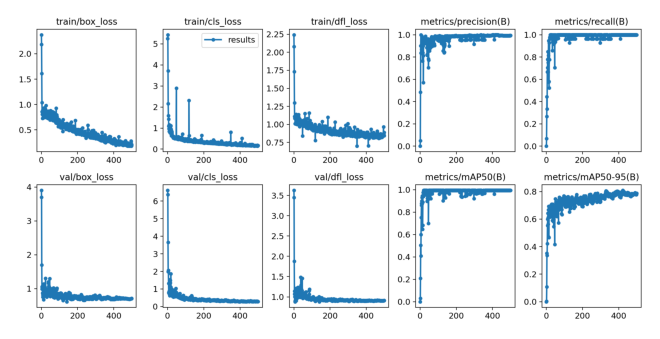

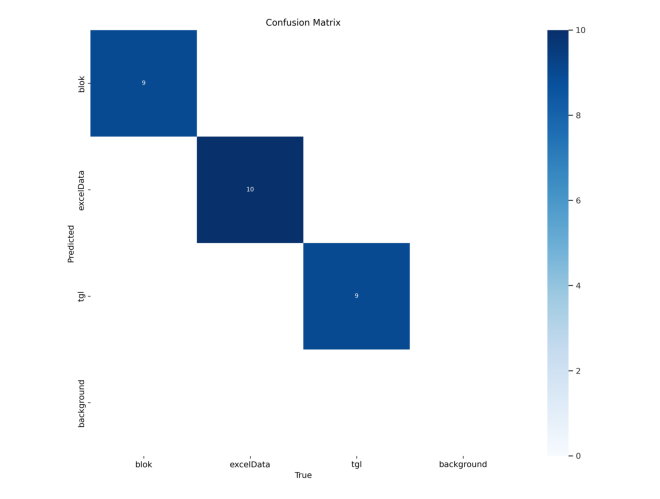

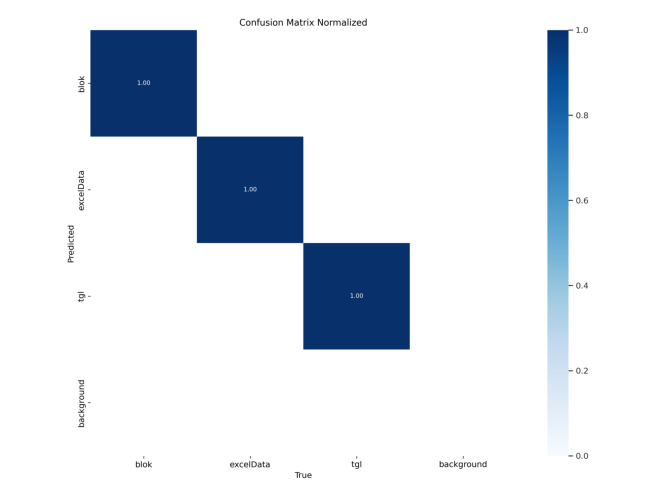

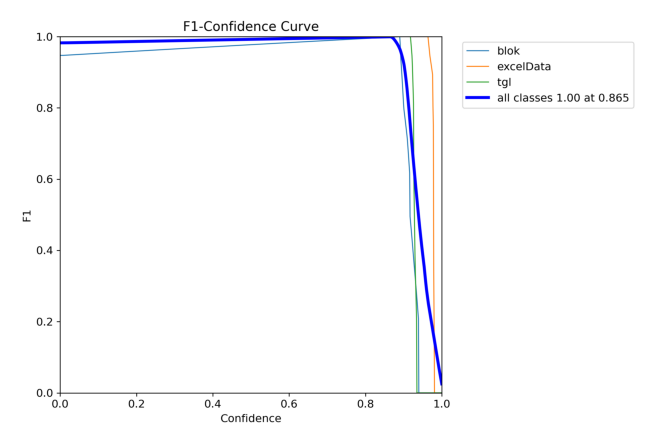

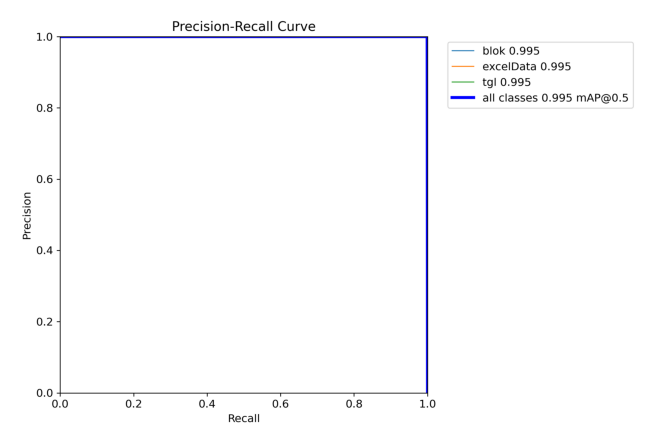

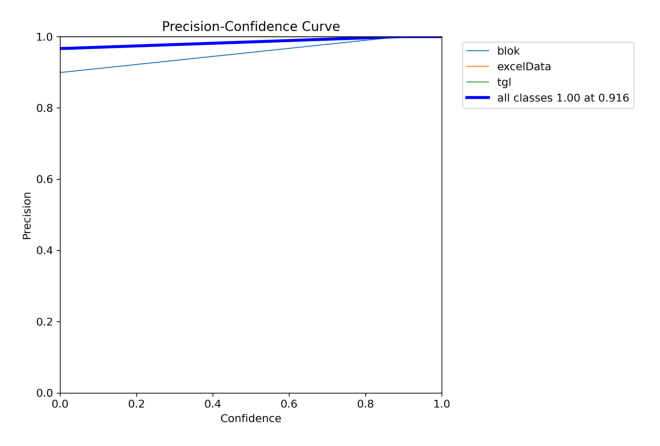

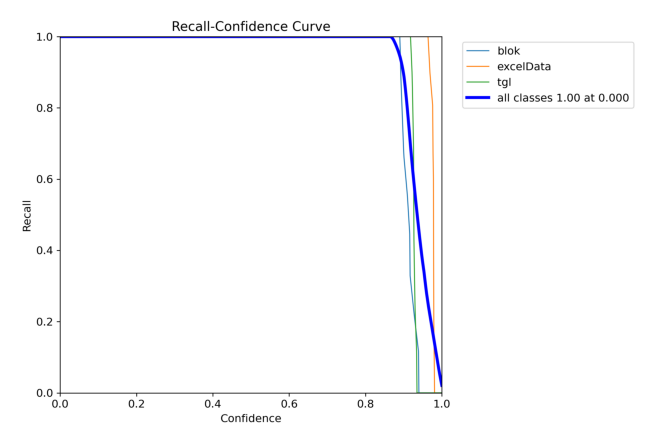

In [7]:
from ultralytics import YOLO

epochs = 500 #@param {type:"integer"}
imgSize = 640 #@param {type:"integer"}
batch = 16 #@param {type:"integer"}
patience = 150 #@param {type:"integer"}

# Load a model
model = YOLO(modelTraining['yaml-file'])  # build a new model from YAML
model = YOLO(modelTraining['pt-weight'])  # load a pretrained model (recommended for training)
model = YOLO(modelTraining['yaml-file']).load(modelTraining['pt-weight'])  # build from YAML and transfer weights

# Train the model
model.train(data = os.path.join(dataset.location, "data.yaml"), epochs = epochs, 
            imgsz = imgSize, batch = batch, 
            device = 0, name = modelTrainingName,
            patience = patience)

In [8]:
task.close()